In [1]:
### Import packages ###
import time
import numpy as np
import math as math
import pandas as pd
import random as random

### Append Path ###
import sys
sys.path.append('..')

### Import functions ###
from utils.Main import *
from utils.Selector import *
from utils.Auxiliary import *
from utils.Prediction import *

# Inputs

In [2]:
### Get Directory ###
cwd = os.getcwd()
ParentDirectory = os.path.abspath(os.path.join(cwd, "..",".."))

### DataType ###
DataFileInput = "BHContinuous"
NSim = 50

# Simulation

In [3]:
all_results = RunSimulationFunction(DataFileInput = DataFileInput,
                                    NSim = NSim,
                                    machine_learning_model = 'LinearRegressionPredictor',
                                    test_proportion = 0.2,
                                    candidate_proportion = 0.8)



--- Running Simulations for: Passive Learning ---


Simulations: 100%|██████████| 50/50 [00:14<00:00,  3.52it/s]



--- Running Simulations for: GSx ---


Simulations: 100%|██████████| 50/50 [00:17<00:00,  2.89it/s]



--- Running Simulations for: GSy ---


Simulations: 100%|██████████| 50/50 [00:19<00:00,  2.61it/s]



--- Running Simulations for: iGS ---


Simulations: 100%|██████████| 50/50 [00:20<00:00,  2.39it/s]



--- Running Simulations for: WiGS (Static w_x=0.25) ---


Simulations: 100%|██████████| 50/50 [00:22<00:00,  2.21it/s]



--- Running Simulations for: WiGS (Static w_x=0.5) ---


Simulations: 100%|██████████| 50/50 [00:20<00:00,  2.39it/s]



--- Running Simulations for: WiGS (Static w_x=0.75) ---


Simulations: 100%|██████████| 50/50 [00:20<00:00,  2.42it/s]



--- Running Simulations for: WiGS (Time-Decay, Linear) ---


Simulations: 100%|██████████| 50/50 [00:20<00:00,  2.43it/s]



--- Running Simulations for: WiGS (Time-Decay, Exponential) ---


Simulations: 100%|██████████| 50/50 [00:21<00:00,  2.37it/s]


# Simulation Results

## Graph Parameters

In [7]:
### Labels ###
Y_Label = "RMSE"
PlotSubtitle = "Active Learning Performance Comparison on MPG Dataset"


### Colors ###
colors = {
    # Original methods with distinct colors
    'Passive Learning': 'gray',
    'GSx': 'cornflowerblue',
    'GSy': 'salmon',
    'iGS': 'red',

    # WiGS Static methods in shades of green to group them
    'WiGS (Static w_x=0.75)': 'lightgreen',
    'WiGS (Static w_x=0.5)': 'forestgreen',
    'WiGS (Static w_x=0.25)': 'darkgreen',

    # WiGS Time-Decay methods in shades of orange/brown
    'WiGS (Time-Decay, Linear)': 'orange',
    'WiGS (Time-Decay, Exponential)': 'saddlebrown'
}

### Line styles ###
linestyles = {
    'Passive Learning': ':',
    'GSx': ':',
    'GSy': ':',
    'iGS': '-',
    'WiGS (Static w_x=0.75)': '-',
    'WiGS (Static w_x=0.5)': '-.',
    'WiGS (Static w_x=0.25)': '--',
    'WiGS (Time-Decay, Linear)': '-',
    'WiGS (Time-Decay, Exponential)': '-.'
}

### Legend ###
LegendMapping = {
    'Passive Learning': 'Random',
    'GSx': 'GSx',
    'GSy': 'GSy',
    'iGS': 'iGS',
    'WiGS (Static w_x=0.75)': 'WiGS (Static, w_x=0.75)',
    'WiGS (Static w_x=0.5)': 'WiGS (Static, w_x=0.5)',
    'WiGS (Static w_x=0.25)': 'WiGS (Static, w_x=0.25)',
    'WiGS (Time-Decay, Linear)': 'WiGS (Linear Decay)',
    'WiGS (Time-Decay, Exponential)': 'WiGS (Exponential Decay)'
}

## Graph Inputs

In [15]:
### Plots ###
strategies_to_plot = [
    ### Original Methods ###
    # 'Passive Learning',
    # 'GSx',
    # 'GSy',
    'iGS',

    # ### WIGS Methods (Static) ###
    # 'WiGS (Static w_x=0.25)',  # Favors exploration (GSx)
    # 'WiGS (Static w_x=0.5)',   # Balanced approach
    'WiGS (Static w_x=0.75)',  # Favors exploitation (GSy)

    ### WiGS Methods (Time-decayed) ###
    'WiGS (Time-Decay, Linear)',
    'WiGS (Time-Decay, Exponential)',
    ]

filtered_results_to_plot = {key: all_results[key] for key in strategies_to_plot if key in all_results}


## Plot

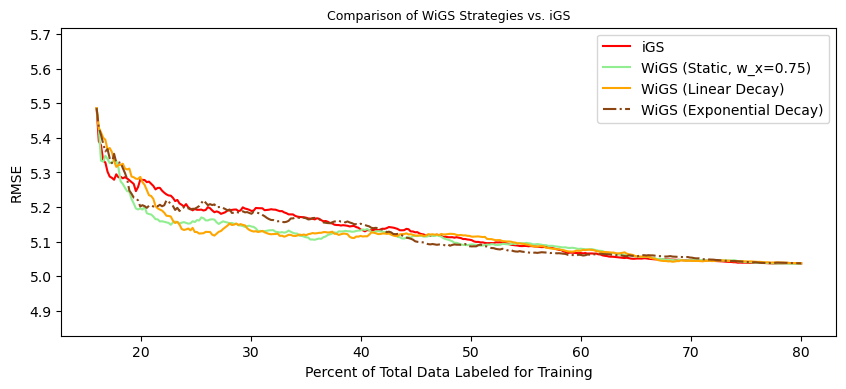

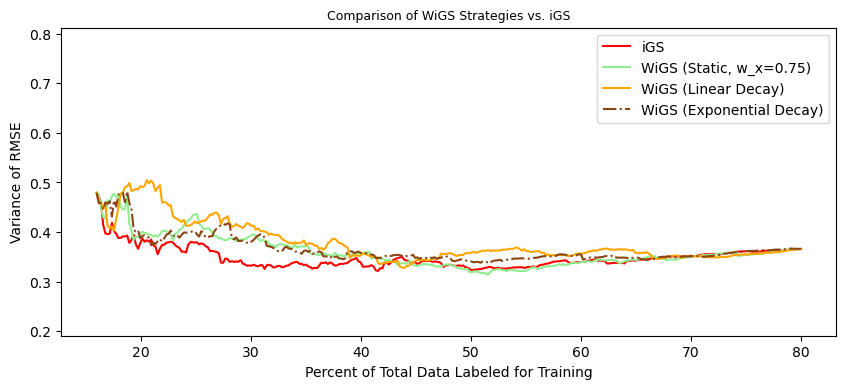

In [16]:
TracePlotMean, TracePlotVariance = MeanVariancePlot(
    RelativeError=None,
    Colors=colors,
    LegendMapping=LegendMapping,
    Linestyles=linestyles,
    Y_Label=Y_Label,
    Subtitle="Comparison of WiGS Strategies vs. iGS", # Updated subtitle
    TransparencyVal=0.00,
    VarInput=True,
    CriticalValue=1.96,
    initial_train_proportion=0.16,
    candidate_pool_proportion=0.64,
    **filtered_results_to_plot # Pass the new, smaller dictionary
)
